In [ ]:
import pandas as pd
url=("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone=pd.read_csv(url,header=None)

In [ ]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
abalone.columns=["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]

In [ ]:
abalone=abalone.drop("Sex",axis=1)

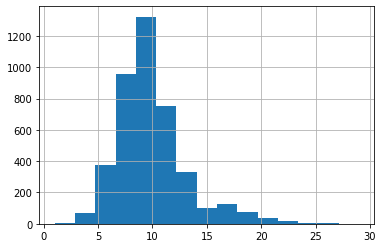

In [ ]:
import matplotlib.pyplot as plt
abalone["Rings"].hist(bins=15)
plt.show()

In [ ]:
correlation_matrix=abalone.corr()
correlation_matrix["Rings"]

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [ ]:
import numpy as np
a=np.array([2,2])
b=np.array([4,4])
np.linalg.norm(a-b)

2.8284271247461903

In [ ]:
X=abalone.drop("Rings",axis=1)
X=X.values
y=abalone["Rings"]
y=y.values

In [ ]:
new_data_point=np.array([0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208])

In [ ]:
distances=np.linalg.norm(X-new_data_point,axis=1)

In [ ]:
k=3
nearest_neighbour_ids=distances.argsort()[:k]
nearest_neighbour_ids



array([4045, 1902, 1644])

In [ ]:
nearest_neighbour_rings=y[nearest_neighbour_ids]
nearest_neighbour_rings

array([ 9, 11, 10])

In [ ]:
prediction=nearest_neighbour_rings.mean()

In [ ]:
import scipy.stats
class_neighbours=np.array(["A","B","B","C"])
scipy.stats.mode(class_neighbours)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=3)

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds=knn_model.predict(X_train)
mse=mean_squared_error(y_train,train_preds)
rmse=sqrt(mse)
rmse

1.6538366794859511

In [ ]:
test_preds=knn_model.predict(X_test)
mse=mean_squared_error(y_test,test_preds)
rmse=sqrt(mse)
rmse

2.375417924000521

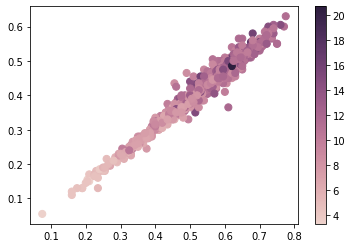

In [ ]:
import seaborn as sns
cmap=sns.cubehelix_palette(as_cmap=True)
f,ax=plt.subplots()
points=ax.scatter(X_test[:,0],X_test[:,1],c=test_preds,s=50,cmap=cmap)
f.colorbar(points)
plt.show()

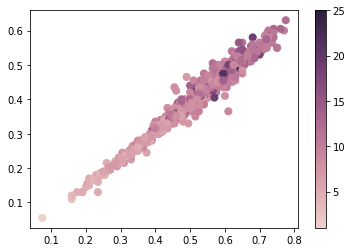

In [ ]:
cmap=sns.cubehelix_palette(as_cmap=True)
f,ax=plt.subplots()
points=ax.scatter(X_test[:,0],X_test[:,1],c=y_test,s=50,cmap=cmap)
f.colorbar(points)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={"n_neighbors":range(1,50)}
gridsearch=GridSearchCV(KNeighborsRegressor(),parameters)
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 25}

In [ ]:
train_preds_grid=gridsearch.predict(X_train)
train_mse=mean_squared_error(y_train,train_preds_grid)
train_rmse=sqrt(train_mse)
test_preds_grid=gridsearch.predict(X_test)
test_mse=mean_squared_error(y_test,test_preds_grid)
test_rmse=sqrt(test_mse)
print(train_rmse)

2.0731180327543384


In [ ]:
print(test_rmse)

2.1700197339962175


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters=[{"n_neighbors":range(1,50),"weights":["uniform","distance"]}]
gridsearch=GridSearchCV(KNeighborsRegressor(),parameters)
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': range(1, 50),
                          'weights': ['uniform', 'distance']}])

In [ ]:
gridsearch.best_params_

{'n_neighbors': 25, 'weights': 'distance'}

In [ ]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(n_neighbors=best_k, weights=best_weights)

In [ ]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [ ]:
bagging_model.fit(X_train,y_train)

BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=25,
                                                    weights='distance'),
                 n_estimators=100)

In [ ]:
test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

2.1628980525696764